In [1]:
import sys, os
sys.path.append(os.path.abspath('../../classifiers'))
sys.path.append(os.path.abspath('../../training'))
sys.path.append(os.path.abspath('../../validation'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier
from plot_graphs import plot_graph_mult_lines

from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
iris = datasets.load_iris()

X = iris.data[:, [0,1,2,3]]
y = iris.target

classifier_function = iqc_classifier
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = True
dic_classifier_params["normalize_axis"] = 1

dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": False,
    "plot_graphs_in_classifier": False,
    "random_seed": 1,
    "learning_rate": 0.01,
    "refit_db":True,
    "reset_weights_epoch":0,
    "do_classes_refit":True,
    "batch":False}

n_times_kfold = 20
k_times_fold = 10

In [3]:
%%time
scores_list = []
f1scores_list = []
negativities_list = []
for max_iter in range(1, 1000, 10):
    dic_training_params["max_iter"] = max_iter
    scores, f1scores, negativities = execute_training_test_k_fold(
                    X, 
                    y, 
                    k_folds=k_times_fold,
                    random_seed = 1, 
                    classifier_function=classifier_function, 
                    dic_classifier_params=dic_classifier_params,
                    one_vs_classifier=OneVsRestClassifier, 
                    dic_training_params=dic_training_params,
                    print_each_fold_metric=True,
                    print_avg_metric=True)
    scores_list.append(scores)
    f1scores_list.append(f1scores)
    negativities_list.append(negativities)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #0: Negativities: [-1.3322676295501878e-16, -1.1472304587793285e-16, -7.031412489292658e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1: Negativities: [-1.4432899320127036e-16, -9.62193288008469e-17, -4.4408920985006264e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.0362081563168128e-16, -1.1102230246251565e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3: Negativities: [-1.0362081563168128e-16, -1.1842378929335003e-16, -1.1472304587793285e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #4: Negativities: [-7.401486830834377e-17, -5.551115123125783e-17, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #5: Negativities: [-8.511709855459534e-17, -1.1102230246251565e-16, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #6: Negativities: [-1.591319668629391e-16, -1.0732155904709847e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.3

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-1.295260195396016e-16, -1.2212453270876723e-16, -1.7023419710919068e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #8: Negativities: [-1.4802973661668753e-16, -9.251858538542972e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #9: Negativities: [-7.771561172376095e-17, -7.401486830834377e-17, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.33333333333333337 F1-Scores = 0.16666666666666669 Negativity= -1.0867849829941812e-16


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #0: Negativities: [-1.3322676295501878e-16, -1.4062824978585316e-16, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.45      1.00      0.62         5
           2       1.00      0.80      0.89         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1: Negativities: [-1.4432899320127036e-16, -1.3322676295501878e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       1.00      1.00      1.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.0362081563168128e-16, -8.141635513917814e-17, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.80      0.53         5
           2       0.80      0.80      0.80         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.44        15
weighted avg       0.40      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3: Negativities: [-1.3692750637043598e-16, -1.554312234475219e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.80      0.53         5
           2       0.80      0.80      0.80         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.44        15
weighted avg       0.40      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4: Negativities: [-7.401486830834377e-17, -1.0362081563168128e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.60      0.43         5
           2       0.67      0.80      0.73         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4802973661668753e-16, -1.0732155904709847e-16, -9.251858538542972e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.83      1.00      0.91         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6: Negativities: [-1.5173048003210473e-16, -1.4432899320127036e-16, -1.4062824978585316e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.83      1.00      0.91         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-1.295260195396016e-16, -7.771561172376095e-17, -1.3692750637043598e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.45      1.00      0.62         5
           2       1.00      0.80      0.89         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-9.992007221626409e-17, -8.881784197001253e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       1.00      1.00      1.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9: Negativities: [-1.591319668629391e-16, -9.62193288008469e-17, -3.3306690738754695e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.36      0.80      0.50         5
           2       0.75      0.60      0.67         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5733333333333334 F1-Scores = 0.47704425204425205 Negativity= -1.1620334324409971e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0: Negativities: [-6.29126380620922e-17, -1.4062824978585316e-16, -5.551115123125783e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.45      1.00      0.62         5
           2       1.00      0.80      0.89         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1: Negativities: [-8.511709855459534e-17, -1.3322676295501878e-16, -8.511709855459534e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       1.00      1.00      1.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-6.661338147750939e-17, -8.141635513917814e-17, -1.6653345369377348e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.80      0.53         5
           2       0.80      0.80      0.80         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.44        15
weighted avg       0.40      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3: Negativities: [-1.2212453270876723e-16, -1.554312234475219e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.80      0.53         5
           2       0.80      0.80      0.80         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.44        15
weighted avg       0.40      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4: Negativities: [3.7007434154171884e-18, -1.0362081563168128e-16, -8.141635513917814e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.60      0.43         5
           2       0.67      0.80      0.73         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-9.251858538542972e-17, -1.0732155904709847e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.83      1.00      0.91         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6: Negativities: [-9.992007221626409e-17, -1.4432899320127036e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.83      1.00      0.91         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-3.3306690738754695e-17, -7.771561172376095e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.45      1.00      0.62         5
           2       1.00      0.80      0.89         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-7.771561172376095e-17, -8.881784197001253e-17, -8.141635513917814e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       1.00      1.00      1.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9: Negativities: [-1.6653345369377348e-16, -9.62193288008469e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.36      0.80      0.50         5
           2       0.75      0.60      0.67         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5733333333333334 F1-Scores = 0.47704425204425205 Negativity= -1.011536533547365e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0: Negativities: [-7.401486830834377e-18, -1.4062824978585316e-16, -7.031412489292658e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.45      1.00      0.62         5
           2       1.00      0.80      0.89         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1: Negativities: [-1.0362081563168128e-16, -1.3322676295501878e-16, -4.4408920985006264e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       1.00      1.00      1.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.141635513917814e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.80      0.53         5
           2       0.80      0.80      0.80         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.44        15
weighted avg       0.40      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3: Negativities: [-7.401486830834377e-17, -1.554312234475219e-16, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.80      0.53         5
           2       0.80      0.80      0.80         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.44        15
weighted avg       0.40      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4: Negativities: [-7.401486830834377e-17, -1.0362081563168128e-16, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.60      0.43         5
           2       0.67      0.80      0.73         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-8.141635513917814e-17, -1.0732155904709847e-16, -1.1472304587793285e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       1.00      1.00      1.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6: Negativities: [-8.881784197001253e-17, -1.4432899320127036e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.83      1.00      0.91         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-1.6653345369377348e-16, -7.771561172376095e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.45      1.00      0.62         5
           2       1.00      0.80      0.89         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-4.070817756958907e-17, -8.881784197001253e-17, -1.4062824978585316e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       1.00      1.00      1.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9: Negativities: [-1.6653345369377348e-16, -9.62193288008469e-17, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.36      0.80      0.50         5
           2       0.75      0.60      0.67         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.58 F1-Scores = 0.48324915824915815 Negativity= -1.0362081563168129e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0: Negativities: [-7.401486830834377e-18, -9.62193288008469e-17, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1: Negativities: [-1.554312234475219e-16, -9.992007221626409e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -7.401486830834377e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3: Negativities: [-7.401486830834377e-17, -9.62193288008469e-17, -6.661338147750939e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4: Negativities: [7.401486830834377e-17, -1.0362081563168128e-16, -3.3306690738754695e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.60      0.43         5
           2       0.67      0.80      0.73         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6: Negativities: [-8.881784197001253e-17, -1.2212453270876723e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-1.6653345369377348e-16, -7.771561172376095e-17, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.45      1.00      0.62         5
           2       1.00      0.80      0.89         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, 3.7007434154171884e-18, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9: Negativities: [-3.700743415417188e-17, -1.0362081563168128e-16, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.64 F1-Scores = 0.5334355459355459 Negativity= -8.943463253924872e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0: Negativities: [-7.401486830834377e-18, -5.921189464667501e-17, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1: Negativities: [-1.554312234475219e-16, -1.887379141862766e-16, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.1102230246251565e-16, -1.0732155904709847e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3: Negativities: [-7.401486830834377e-17, -1.1102230246251565e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4: Negativities: [7.401486830834377e-17, -1.0362081563168128e-16, -3.3306690738754695e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.60      0.43         5
           2       0.67      0.80      0.73         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4062824978585316e-16, -3.3306690738754695e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6: Negativities: [-8.881784197001253e-17, -7.771561172376095e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-1.6653345369377348e-16, -7.771561172376095e-17, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, -1.6653345369377348e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9: Negativities: [-3.700743415417188e-17, -5.551115123125783e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6466666666666667 F1-Scores = 0.5385281385281384 Negativity= -9.313537595466591e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0: Negativities: [-7.401486830834377e-18, -1.0362081563168128e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1: Negativities: [-1.554312234475219e-16, -5.551115123125783e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -1.0732155904709847e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.924386576016938e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4: Negativities: [7.401486830834377e-17, -1.0362081563168128e-16, -3.3306690738754695e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.60      0.43         5
           2       0.67      0.80      0.73         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.1472304587793285e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1472304587793285e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-1.6653345369377348e-16, -7.771561172376095e-17, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, -9.62193288008469e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9: Negativities: [-3.700743415417188e-17, -5.551115123125783e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6533333333333334 F1-Scores = 0.5512265512265511 Negativity= -9.424559897929107e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -7.771561172376095e-17, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1: Negativities: [-1.554312234475219e-16, -5.551115123125783e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -1.0732155904709847e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.924386576016938e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4: Negativities: [7.401486830834377e-17, -1.0362081563168128e-16, -3.3306690738754695e-17]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.60      0.43         5
           2       0.67      0.80      0.73         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.1472304587793285e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.6283271027835628e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.554312234475219e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, -9.62193288008469e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, 6.29126380620922e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.66 F1-Scores = 0.5795537795537796 Negativity= -9.362880841005489e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -7.771561172376095e-17, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -6.29126380620922e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.62      1.00      0.77         5
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -1.4062824978585316e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.924386576016938e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -8.511709855459534e-17, -3.3306690738754695e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.1472304587793285e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.6283271027835628e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.554312234475219e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, -9.62193288008469e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, 6.29126380620922e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.6317460317460318 Negativity= -9.436895709313832e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -7.771561172376095e-17, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -6.29126380620922e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.62      1.00      0.77         5
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -1.258252761241844e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.924386576016938e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -8.511709855459534e-17, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.1472304587793285e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.6283271027835628e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.0732155904709847e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.62      1.00      0.77         5
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, -9.62193288008469e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, 6.29126380620922e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7066666666666667 F1-Scores = 0.6493284493284495 Negativity= -9.239522727158248e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.295260195396016e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.71      1.00      0.83         5
           2       1.00      0.80      0.89         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.87        15
weighted avg       0.90      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -6.29126380620922e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.62      1.00      0.77         5
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -6.661338147750939e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.924386576016938e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -8.511709855459534e-17, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.1472304587793285e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.4802973661668753e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.0732155904709847e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.62      1.00      0.77         5
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, -9.62193288008469e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, 6.29126380620922e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.74 F1-Scores = 0.6914082214082214 Negativity= -9.165507858849903e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -5.551115123125783e-17, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      0.80      0.73         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.82      0.80      0.81        15
weighted avg       0.82      0.80      0.81        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -6.29126380620922e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.62      1.00      0.77         5
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -6.661338147750939e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.924386576016938e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -6.29126380620922e-17, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.1472304587793285e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.554312234475219e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.0732155904709847e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.62      1.00      0.77         5
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, -9.62193288008469e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.295260195396016e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.80      0.73         5
           2       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7666666666666667 F1-Scores = 0.7243652643652643 Negativity= -9.510910577622176e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -6.29126380620922e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.62      1.00      0.77         5
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.1472304587793285e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.80      0.73         5
           2       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -8.881784197001253e-17, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.1472304587793285e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.4062824978585316e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8: Negativities: [-8.141635513917814e-17, -9.62193288008469e-17, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.591319668629391e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7866666666666667 F1-Scores = 0.7625505975505976 Negativity= -1.0164708581012544e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -5.551115123125783e-17, -1.4802973661668753e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.3692750637043598e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -8.881784197001253e-17, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -9.251858538542972e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.4432899320127036e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.5173048003210473e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.258252761241844e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.591319668629391e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8266666666666665 F1-Scores = 0.8155050505050504 Negativity= -1.0386753185937577e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -5.551115123125783e-17, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.3692750637043598e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -1.3322676295501878e-16, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -9.251858538542972e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.4432899320127036e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.5173048003210473e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.258252761241844e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -6.29126380620922e-17, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8266666666666665 F1-Scores = 0.8155050505050504 Negativity= -9.905656541933343e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.0362081563168128e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8266666666666665 F1-Scores = 0.8138637288637287 Negativity= -1.0004343033011133e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.4802973661668753e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, 7.401486830834377e-18]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8466666666666667 F1-Scores = 0.8449748399748401 Negativity= -1.0004343033011134e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.2212453270876723e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, 7.401486830834377e-18]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8466666666666667 F1-Scores = 0.8449748399748401 Negativity= -9.917992353318066e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.3322676295501878e-16, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, 7.401486830834377e-18]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8533333333333333 F1-Scores = 0.8515741665741665 Negativity= -9.362880841005487e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.6653345369377348e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8649074999074999 Negativity= -9.732955182547207e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -1.0362081563168128e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.57      0.80      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.79      0.73      0.74        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -8.511709855459534e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -3.700743415417188e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.86 F1-Scores = 0.8583081733081734 Negativity= -9.856313296394447e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -8.511709855459534e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -4.4408920985006264e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8646899396899397 Negativity= -9.745290993931931e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -9.251858538542972e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -4.4408920985006264e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -5.921189464667501e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8646899396899397 Negativity= -9.76996261670138e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -9.251858538542972e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -4.4408920985006264e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -9.868649107779171e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -9.251858538542972e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -4.4408920985006264e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -9.868649107779171e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -9.251858538542972e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -1.0300402506244508e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -9.251858538542972e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -1.0300402506244508e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -9.251858538542972e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -1.591319668629391e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -1.0300402506244508e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -1.0275730883475061e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -1.0275730883475061e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.554312234475219e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -1.0423760620091747e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.554312234475219e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.7393494052460786e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333333 F1-Scores = 0.872779072779073 Negativity= -1.0423760620091747e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.554312234475219e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.00906937127042e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.554312234475219e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.00906937127042e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.554312234475219e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0177044392397268e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.1102230246251565e-16, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0029014655780582e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -6.29126380620922e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.967335598856962e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -7.031412489292658e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -9.99200722162641e-17


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0201716015166717e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0201716015166717e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, -7.771561172376095e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.554312234475219e-16, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8666666666666666 F1-Scores = 0.8663144263144265 Negativity= -1.0275730883475063e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -9.992007221626409e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8800000000000001 F1-Scores = 0.8795130795130796 Negativity= -1.0041350467165305e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.1842378929335003e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -9.992007221626409e-17, -8.881784197001253e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -9.62193288008469e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8800000000000001 F1-Scores = 0.8795130795130796 Negativity= -1.0041350467165305e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.924386576016938e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.67      0.80      0.73         5
           2       0.83      1.00      0.91         5

    accuracy                           0.80        15
   macro avg       0.83      0.80      0.80        15
weighted avg       0.83      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.8503717077085943e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333334 F1-Scores = 0.8720538720538722 Negativity= -1.1348946473946046e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.924386576016938e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.67      0.80      0.73         5
           2       0.83      1.00      0.91         5

    accuracy                           0.80        15
   macro avg       0.83      0.80      0.80        15
weighted avg       0.83      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.8503717077085943e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -2.0724163126336256e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8733333333333334 F1-Scores = 0.8720538720538722 Negativity= -1.1348946473946046e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.924386576016938e-16, -6.29126380620922e-17]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.67      0.80      0.73         5
           2       0.83      1.00      0.91         5

    accuracy                           0.80        15
   macro avg       0.83      0.80      0.80        15
weighted avg       0.83      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.8503717077085943e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8866666666666667 F1-Scores = 0.8853872053872054 Negativity= -1.0781499150248744e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.258252761241844e-16, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.8503717077085943e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8866666666666667 F1-Scores = 0.886112406112406 Negativity= -1.1262595794252977e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.258252761241844e-16, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.8503717077085943e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8866666666666667 F1-Scores = 0.886112406112406 Negativity= -1.1262595794252977e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.258252761241844e-16, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.8503717077085943e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.1102230246251565e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8866666666666667 F1-Scores = 0.886112406112406 Negativity= -1.1262595794252977e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.258252761241844e-16, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.8503717077085943e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8933333333333333 F1-Scores = 0.8927117327117327 Negativity= -1.129960322840715e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.258252761241844e-16, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -8.881784197001253e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.8503717077085943e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8933333333333333 F1-Scores = 0.8927117327117327 Negativity= -1.129960322840715e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -1.258252761241844e-16, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -4.4408920985006264e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -9.251858538542972e-17, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8866666666666667 F1-Scores = 0.8855568505568506 Negativity= -1.0867849829941812e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -4.4408920985006264e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -9.251858538542972e-17, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8866666666666667 F1-Scores = 0.8855568505568506 Negativity= -1.0744491716094573e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -4.4408920985006264e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -7.401486830834377e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.60      0.60         5
           2       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -9.251858538542972e-17, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.591319668629391e-16, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.8866666666666667 F1-Scores = 0.8855568505568506 Negativity= -1.0744491716094573e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -4.4408920985006264e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.80      0.73         5
           2       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.4432899320127036e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -6.29126380620922e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.9 F1-Scores = 0.8991763791763792 Negativity= -1.0744491716094573e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -4.4408920985006264e-17, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.80      0.73         5
           2       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -6.29126380620922e-17, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.9 F1-Scores = 0.8991763791763792 Negativity= -1.07074842819404e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -1.3692750637043598e-16, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.6653345369377348e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -7.031412489292658e-17, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.80      0.73         5
           2       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.7393494052460786e-16, -1.295260195396016e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.9 F1-Scores = 0.8991763791763792 Negativity= -1.1484640399178011e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -3.3306690738754695e-17, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.6653345369377348e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -1.1842378929335003e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.7393494052460786e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.9200000000000002 F1-Scores = 0.9193783993783994 Negativity= -1.1459968776408562e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -3.3306690738754695e-17, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.6653345369377348e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -1.1842378929335003e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -9.251858538542972e-17, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.7393494052460786e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.9200000000000002 F1-Scores = 0.9193783993783994 Negativity= -1.1459968776408562e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -3.3306690738754695e-17, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.6653345369377348e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -1.1842378929335003e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.3322676295501878e-16, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.7393494052460786e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.9200000000000002 F1-Scores = 0.9193783993783994 Negativity= -1.1595662701640527e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -3.3306690738754695e-17, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.6653345369377348e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -1.1842378929335003e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.3322676295501878e-16, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.7393494052460786e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.9200000000000002 F1-Scores = 0.9193783993783994 Negativity= -1.1595662701640527e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -3.3306690738754695e-17, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.6653345369377348e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -1.1842378929335003e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.3322676295501878e-16, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.7393494052460786e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9: Negativities: [-3.700743415417188e-17, -1.554312234475219e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.9200000000000002 F1-Scores = 0.9193783993783994 Negativity= -1.1595662701640527e-16


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0: Negativities: [-7.401486830834377e-18, -8.881784197001253e-17, -2.7385501274087196e-16]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.80        15
weighted avg       0.88      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1: Negativities: [-1.554312234475219e-16, -3.3306690738754695e-17, 4.070817756958907e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2: Negativities: [-1.5173048003210473e-16, -1.6653345369377348e-16, -1.2212453270876723e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3: Negativities: [-7.401486830834377e-17, -1.295260195396016e-16, -4.810966440042345e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4: Negativities: [7.401486830834377e-17, -1.0732155904709847e-16, -1.1842378929335003e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5: Negativities: [-1.4062824978585316e-16, -1.3322676295501878e-16, -2.331468351712829e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6: Negativities: [-8.881784197001253e-17, -1.3322676295501878e-16, -9.992007221626409e-17]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7: Negativities: [-1.6653345369377348e-16, -1.7393494052460786e-16, -1.7763568394002506e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8: Negativities: [-8.141635513917814e-17, -1.554312234475219e-16, -1.8503717077085943e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #9: Negativities: [-3.700743415417188e-17, -1.295260195396016e-16, -1.4432899320127036e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


In [4]:
print("Media Score dos N K-Fold", np.mean([np.mean(i) for i in scores_list]))
print("Maior Score dos K-Fold", max([np.mean(i) for i in scores_list]))
print("Menor Score dos K-Fold", min([np.mean(i) for i in scores_list]))

print()
print()
print(scores_list)

Media Score dos N K-Fold 0.8429999999999999
Maior Score dos K-Fold 0.9266666666666667
Menor Score dos K-Fold 0.33333333333333337


[[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.6, 0.6666666666666666, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.6, 0.6, 0.6, 0.6666666666666666, 0.4666666666666667], [0.6, 0.6666666666666666, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.6, 0.6, 0.6, 0.6666666666666666, 0.4666666666666667], [0.6, 0.6666666666666666, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.6666666666666666, 0.6, 0.6, 0.6666666666666666, 0.4666666666666667], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.4666666666666667, 0.6666666666666666, 0.6666666666666666, 0.6, 0.6666666666666666, 0.6666666666666666], [0.6666666666666666, 0.666666666666666

In [5]:
print("Media F1Score dos N K-Fold", np.mean([np.mean(i) for i in f1scores]))
print("Maior F1Score dos K-Fold", max([np.mean(i) for i in f1scores]))
print("Menor F1Score dos K-Fold", min([np.mean(i) for i in f1scores]))

print()
print()
print(f1scores)

Media F1Score dos N K-Fold 0.9261124061124061
Maior F1Score dos K-Fold 1.0
Menor F1Score dos K-Fold 0.8027065527065527


[0.8027065527065527, 1.0, 0.8666666666666668, 0.9326599326599326, 0.9326599326599326, 0.861111111111111, 1.0, 0.9326599326599326, 0.9326599326599326, 1.0]


In [6]:
print("Media Negativity dos N K-Fold", [np.mean([neg[i] for neg in negativities_list]) for i in range(len(set(y)))])

print()
print()
print(negativities_list)

Media Negativity dos N K-Fold [-8.37774294382143e-17, -1.1795009413617663e-16, -1.0528244942520359e-16]


[[[-1.3322676295501878e-16, -1.4432899320127036e-16, -1.0362081563168128e-16, -1.0362081563168128e-16, -7.401486830834377e-17, -8.511709855459534e-17, -1.591319668629391e-16, -1.295260195396016e-16, -1.4802973661668753e-16, -7.771561172376095e-17], [-1.1472304587793285e-16, -9.62193288008469e-17, -1.1102230246251565e-16, -1.1842378929335003e-16, -5.551115123125783e-17, -1.1102230246251565e-16, -1.0732155904709847e-16, -1.2212453270876723e-16, -9.251858538542972e-17, -7.401486830834377e-17], [-7.031412489292658e-17, -4.4408920985006264e-17, -1.1842378929335003e-16, -1.1472304587793285e-16, -1.1842378929335003e-16, -8.881784197001253e-17, -1.2212453270876723e-16, -1.7023419710919068e-16, -1.4802973661668753e-16, -1.0362081563168128e-16]], [[-1.3322676295501878e-16, -1.4432899320127036e-16, -1.0362081563168128e-16, -1.3692750637043598e-16, -7.401486830834377e-17, -1.4802973661668753e-

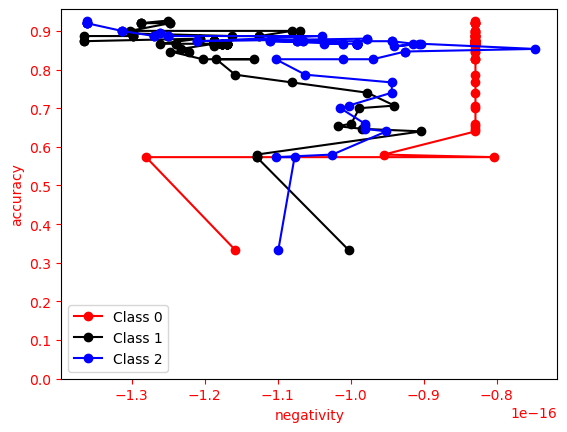

In [11]:
all_neg_by_class = [[np.mean(negativity_list_by_class[clazz]) for negativity_list_by_class in negativities_list] for clazz in range(len(set(y)))]
all_negativities = [all_neg_by_class[clazz] for clazz in range(len(set(y)))]
plot_graph_mult_lines(all_neg_by_class, [np.mean(i) for i in scores_list], "negativity", "accuracy")